In [34]:
datos=spark.read.csv("Ventas1/",header=True,inferSchema=True,
                     timestampFormat="MM/dd/yyyy")

In [35]:
datos.orderBy("ProductID").show(10),datos.printSchema()

+---------+-------------------+--------------+-----+-------+-------+
|ProductID|               Date|           Zip|Units|Revenue|Country|
+---------+-------------------+--------------+-----+-------+-------+
|        1|2013-04-13 00:00:00|           T2J|    1|412.125| Canada|
|        1|2014-04-30 00:00:00|75926 CEDEX 19|    1| 412.13| France|
|        1|2013-04-27 00:00:00|           T2J|    1|412.125| Canada|
|        1|2013-05-31 00:00:00|           T5J|    1|412.125| Canada|
|        1|2013-04-23 00:00:00|75387 CEDEX 08|    1| 412.13| France|
|        1|2013-05-10 00:00:00|75972 CEDEX 20|    1| 412.13| France|
|        1|2013-06-26 00:00:00| 06287 CEDEX 3|    1| 412.13| France|
|        1|2013-08-08 00:00:00|75637 CEDEX 13|    1| 412.13| France|
|        1|2014-02-26 00:00:00|75436 CEDEX 09|    1| 412.13| France|
|        1|2014-04-09 00:00:00|75677 CEDEX 14|    1| 412.13| France|
+---------+-------------------+--------------+-----+-------+-------+
only showing top 10 rows

root
 |-

(None, None)

In [36]:
grupo=datos.groupBy("ProductID")

In [37]:
grupo.count().show(5)

+---------+-----+
|ProductID|count|
+---------+-----+
|      833|  430|
|     1088|   83|
|      496| 2533|
|     1829|   73|
|     1959|  239|
+---------+-----+
only showing top 5 rows



In [38]:
grupo.sum("Revenue").orderBy("sum(Revenue)",ascending=False)\
    .limit(5).show()

+---------+-------------------+
|ProductID|       sum(Revenue)|
+---------+-------------------+
|      475|1.266706754000043E7|
|      487|1.231618260750072E7|
|      826|  9377873.357500084|
|      506|  9244344.485000096|
|      438|   9172772.40250015|
+---------+-------------------+



In [39]:
grupoP=grupo.sum("Revenue").orderBy("sum(Revenue)",ascending=False)\
    .limit(5).toPandas()

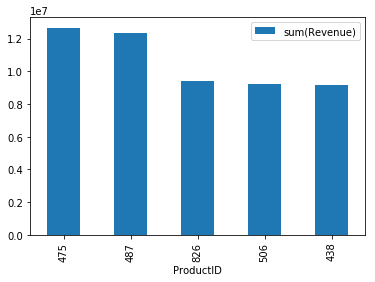

In [40]:
grupoP.plot.bar(x="ProductID")

In [43]:
datos.select("Country").distinct().show()

+-------+
|Country|
+-------+
|Germany|
| France|
| Mexico|
| Canada|
+-------+



In [44]:
datos.groupBy("Country").count().show()

+-------+------+
|Country| count|
+-------+------+
|Germany|234072|
| France|314750|
| Mexico|217007|
| Canada| 75318|
+-------+------+



In [46]:
datos.show(n=2),datos.printSchema()

+---------+-------------------+--------------+-----+-------+-------+
|ProductID|               Date|           Zip|Units|Revenue|Country|
+---------+-------------------+--------------+-----+-------+-------+
|      726|1999-01-15 00:00:00|75056 CEDEX 01|    1| 115.45| France|
|     1909|1999-01-15 00:00:00|75056 CEDEX 01|    2|  398.9| France|
+---------+-------------------+--------------+-----+-------+-------+
only showing top 2 rows

root
 |-- ProductID: integer (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Zip: string (nullable = true)
 |-- Units: integer (nullable = true)
 |-- Revenue: double (nullable = true)
 |-- Country: string (nullable = true)



(None, None)

In [50]:
datosUSA=spark.read.csv("Ventas2/",sep=";",inferSchema=True)
datosUSA.show(2),datosUSA.printSchema()

+---+-------------------+-----+---+--------+
|_c0|                _c1|  _c2|_c3|     _c4|
+---+-------------------+-----+---+--------+
|833|1999-01-15 00:00:00|76108|  1|797,9475|
|837|1999-01-15 00:00:00|33436|  1|813,6975|
+---+-------------------+-----+---+--------+
only showing top 2 rows

root
 |-- _c0: integer (nullable = true)
 |-- _c1: timestamp (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: string (nullable = true)



(None, None)

In [65]:
from pyspark.sql.functions import translate,lit

datosUSA2=datosUSA\
    .withColumn("_c2",datosUSA["_c2"].cast("string"))\
    .withColumn("_c4",translate("_c4",",",".").cast("double"))\
    .withColumn("Country",lit("USA"))

datosUSA2.show(2),datosUSA2.printSchema()

+---+-------------------+-----+---+--------+-------+
|_c0|                _c1|  _c2|_c3|     _c4|Country|
+---+-------------------+-----+---+--------+-------+
|833|1999-01-15 00:00:00|76108|  1|797.9475|    USA|
|837|1999-01-15 00:00:00|33436|  1|813.6975|    USA|
+---+-------------------+-----+---+--------+-------+
only showing top 2 rows

root
 |-- _c0: integer (nullable = true)
 |-- _c1: timestamp (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: double (nullable = true)
 |-- Country: string (nullable = false)



(None, None)

In [66]:
ventasMundiales=datos.union(datosUSA2)

In [67]:
ventasMundiales.show()

+---------+-------------------+--------------+-----+-------+-------+
|ProductID|               Date|           Zip|Units|Revenue|Country|
+---------+-------------------+--------------+-----+-------+-------+
|      726|1999-01-15 00:00:00|75056 CEDEX 01|    1| 115.45| France|
|     1909|1999-01-15 00:00:00|75056 CEDEX 01|    2|  398.9| France|
|     1961|1999-02-15 00:00:00|75056 CEDEX 01|    1|  97.07| France|
|     1517|1999-02-15 00:00:00|75056 CEDEX 01|    1| 141.65| France|
|      606|1999-02-15 00:00:00|75056 CEDEX 01|    1| 314.74| France|
|     1518|1999-02-15 00:00:00|75056 CEDEX 01|    1| 141.65| France|
|      786|2002-05-31 00:00:00|         75001|    1|   68.2| France|
|      727|1999-01-15 00:00:00|75063 CEDEX 02|    2|  125.9| France|
|      559|1999-01-15 00:00:00|75063 CEDEX 02|    1| 585.64| France|
|      728|1999-01-15 00:00:00|75063 CEDEX 02|    2|  125.9| France|
|      964|2003-04-10 00:00:00|75063 CEDEX 02|    1|  320.2| France|
|      475|2003-04-11 00:00:00|750

In [68]:
ventasMundiales.count()

1341147

In [70]:
ventasMundiales.cache()

DataFrame[ProductID: int, Date: timestamp, Zip: string, Units: int, Revenue: double, Country: string]

In [74]:
ventasMundiales.groupBy("Country").sum("Units","Revenue").show()

+-------+----------+--------------------+
|Country|sum(Units)|        sum(Revenue)|
+-------+----------+--------------------+
|Germany|    244265|1.3193078992016108E8|
| France|    327730|1.4849113892019716E8|
|    USA|    525021| 2.101612200972829E8|
| Mexico|    223463|1.0364639787017266E8|
| Canada|     77609|  3.41162159100349E7|
+-------+----------+--------------------+

